In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_data=pd.read_csv('datasets/salary.csv')

In [3]:
salary_data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [4]:
x=np.array(salary_data.iloc[:,0].values)
y=np.array(salary_data['Salary'])

In [5]:
from ai.model_selection import train_test_split    

In [6]:
x_train,y_train,x_test,y_test=train_test_split(x,y,0.3)

In [7]:
from ai.machine_learning.linear_models import Linear_regression

In [8]:
model=Linear_regression()

In [9]:
model.fit(x_train,y_train)

In [10]:
y_pred=model.predict(x_test)

In [11]:
y_pred

array([101245.79182646,  73737.450714  ,  66401.89308401,  58149.39075027,
        47146.05430528,  62734.11426901,  65484.94838026, 108581.34945645,
        70069.671899  ])

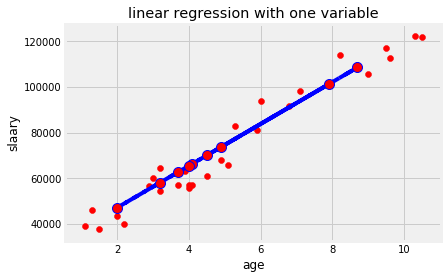

In [12]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("age")
plt.ylabel("slaary")
plt.title("linear regression with one variable")
plt.show()

In [13]:
from ai.metrics import mean_square_error,root_mean_square_error,mean_absolute_error
from ai.metrics import explained_variance_score

In [14]:
print(mean_square_error(y_test,y_pred))
print(root_mean_square_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(f"accuracy is {explained_variance_score(y_test,y_pred)*100}%")

39221429.104887195
6262.701422300699
5282.931346544403
accuracy is 97.01439412457457%


# Fish dataset

In [15]:
fish_data=pd.read_csv("datasets/Fish.csv")
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
from ai.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()
fish_data["Species"]=encoder.fit_transform(fish_data["Species"])
fish_data['Species'].unique()

array([2, 5, 4, 0, 3, 1, 6], dtype=int64)

In [18]:
#fish_data['Species']

In [19]:
len(fish_data['Species'])

159

In [20]:
x=np.array(fish_data.drop(["Weight"],axis=1))
y=np.array(fish_data["Weight"])
x_train,y_train,x_test,y_test=train_test_split(x,y,0.3)

In [21]:
model=Linear_regression()

In [22]:
model.fit(x_train,y_train)

In [23]:
y_pred=model.predict(x_test)

In [24]:
print(mean_square_error(y_test,y_pred))
print(root_mean_square_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(f"accuracy is {explained_variance_score(y_test,y_pred)*100}%")

14140.262026549224
118.91283373357656
89.42349160304484
accuracy is 88.5524934994593%


Text(0.5, 1.0, 'Linear regression')

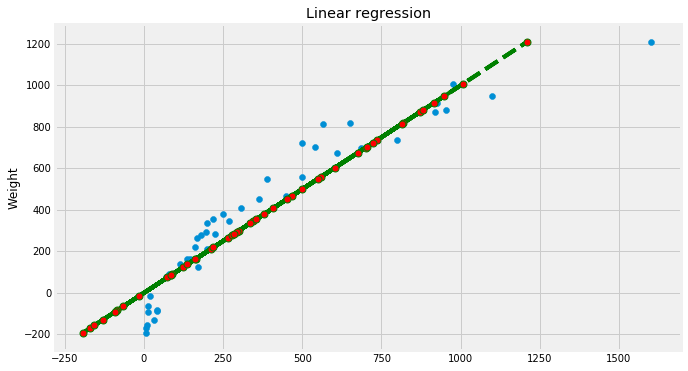

In [25]:
plt.figure(figsize=(10,6))
plt.plot(y_pred,y_pred,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')
plt.scatter(y_test,y_pred,marker="o")
plt.ylabel("Weight")
plt.title("Linear regression")